# Sally's path, with wind, pressure, and sea surface temperature

Uses tropycal
- https://tropycal.github.io/tropycal/index.html
- https://tropycal.github.io/tropycal/examples/analogs.html

In [10]:
#libraries for MUR data
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
#library for best-track (tropycal)
from tropycal import tracks

## HURDAT2 Best track data

In [11]:
#Read the HRDAT2 dataset for North Atlantic
basin = tracks.TrackDataset(basin='north_atlantic',source='hurdat',include_btk=False)
## Get info for Sally
storm = basin.get_storm(('sally',2020))

--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (5.4 seconds)


In [12]:
#HURDAT2 is six-hourly information on the location, maximum winds, central pressure
#what is in storm?
storm.vars.keys()

dict_keys(['time', 'extra_obs', 'special', 'type', 'lat', 'lon', 'vmax', 'mslp', 'wmo_basin'])

In [13]:
#Check as a dataframe
df = storm.to_dataframe()
df.head()

,time,extra_obs,special,type,lat,lon,vmax,mslp,wmo_basin
0,2020-09-11 18:00:00,0,,TD,25.4,-78.6,30,1007,north_atlantic
1,2020-09-12 00:00:00,0,,TD,25.6,-79.4,30,1004,north_atlantic
2,2020-09-12 06:00:00,0,L,TD,25.6,-80.2,30,1003,north_atlantic
3,2020-09-12 12:00:00,0,,TS,25.5,-80.8,35,1003,north_atlantic
4,2020-09-12 18:00:00,0,,TS,25.6,-81.6,35,1003,north_atlantic


## MUR data

The dataset included was manually downloaded from NASA JPL and postprocessed with ncks to extract analysed_sst for the region.

In [14]:
#This is from 'Hurricane Sally'
ds = xr.open_dataset('20200915-SST.nc') #load

In [15]:
#For temperature conversion, although we don't use it here
sst = ds.analysed_sst - 273.15
#Keep the metadata up to date
sst.attrs = ds.analysed_sst.attrs
sst.attrs["units"] = "deg C"

## Sally's path, wind and pressure, with sea surface temperature
Reds are wind and purples are pressure.

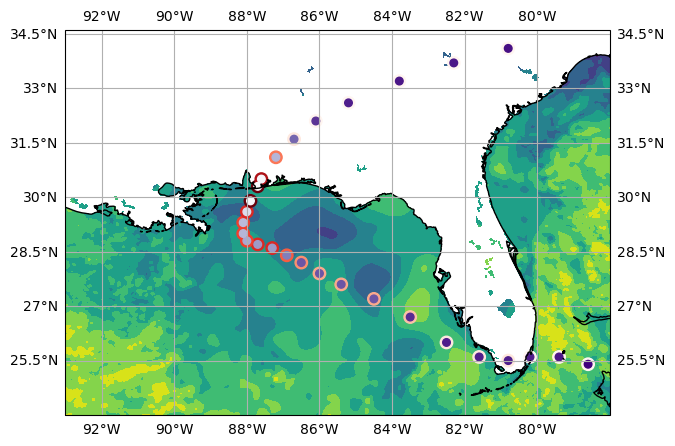

In [16]:
#Plot
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(ds.lon, ds.lat, sst[0,:,:],
             transform=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.scatter(storm.lon, storm.lat, s=80, c=storm.vmax,cmap='Reds',transform=ccrs.PlateCarree())
ax.scatter(storm.lon, storm.lat, s=30, c=storm.mslp,cmap='Purples',transform=ccrs.PlateCarree())
plt.show()